In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [56]:
df = pd.read_csv('COVID19_state.csv')
df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income Per Capita,GDP Per Capita,...,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Avg Temp,Urban,Age 0-25,Age 26-54,Age 55+
0,Alaska,3334,114,3.0,734002,1.2863,0.4081,119,59687,73205,...,1900,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25
1,Alabama,4755,830,4.0,4908621,96.9221,0.4847,1533,42334,45219,...,12205,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31
2,Arkansas,3536,449,6.0,3038999,58.4030,0.4719,732,42566,42454,...,7150,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30
3,Arizona,1303,912,16.0,7378494,64.9550,0.4713,1559,43650,48055,...,17806,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30
4,California,89600,4643,101.0,39937489,256.3727,0.4899,7338,62586,74205,...,112906,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26


In [57]:
y_cases = df['Infected']
y_deaths = df['Deaths']
demo = ['Gini', 'Population', 'Pop Density', 'Income Per Capita', 'GDP Per Capita', 'Unemployment', 
        'Sex Ratio', 'Med-Large Airports', 'Avg Temp', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+']
med = ['Population', 'Tested', 'ICU Beds', 'Sex Ratio', 'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 
       'Physicians', 'Hospitals', 'Pollution', 'Health Spending', 'Age 0-25', 'Age 26-54', 'Age 55+']
X_demo = df[demo]
X_med = df[med]

## Correlation

In [58]:
def make_corr_map(df, title='Correlation Heat Map'):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title)
    plt.show()

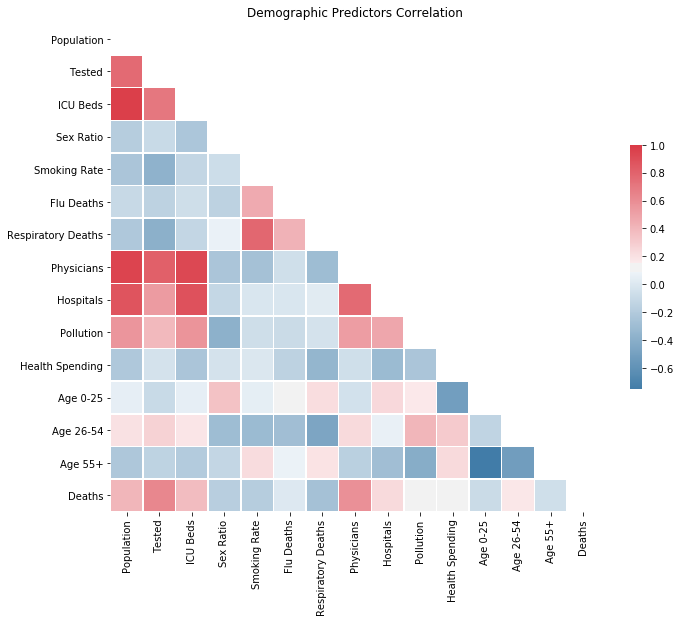

In [59]:
make_corr_map(pd.concat([X_med, df['Deaths']], axis=1), 'Demographic Predictors Correlation')

In [60]:
# plt.scatter(np.log(df['Deaths']), np.log(df['Age 55+']))
# plt.xlabel('Deaths')
# plt.ylabel('55+')
# plt.show()

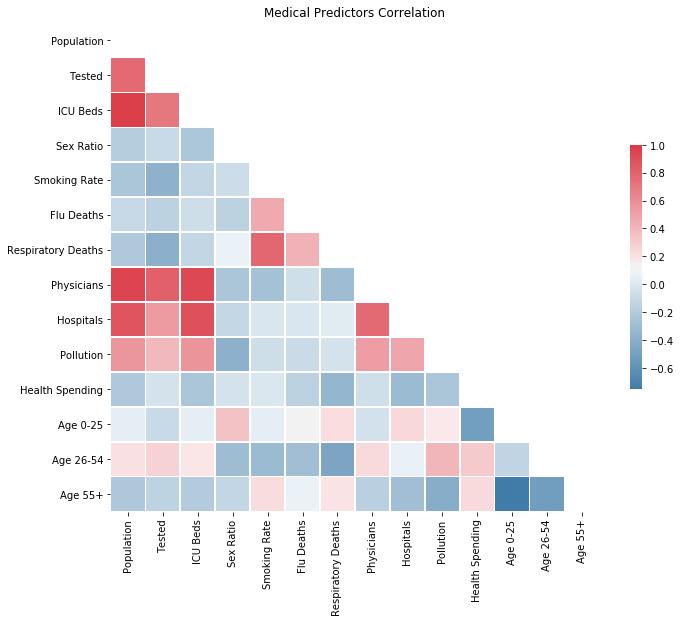

In [61]:
make_corr_map(X_med, 'Medical Predictors Correlation')

## Scaling

In [62]:
X_s = RobustScaler().fit_transform(X_demo)

## XGBoost

Score 0.6080938980470236


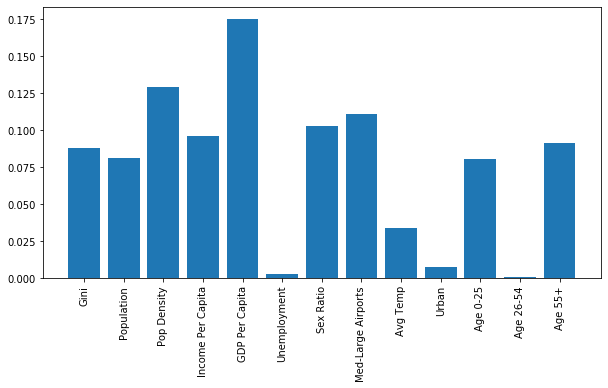

In [63]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_s, y_cases)
print('Score', xg_reg.score(X_s, y_cases))
plt.figure(figsize=(10,5))
plt.bar(X_demo.columns, xg_reg.feature_importances_)
plt.xticks(fontsize=10, rotation=90)
plt.show()

## Random Forest

score 0.8057238847368136 



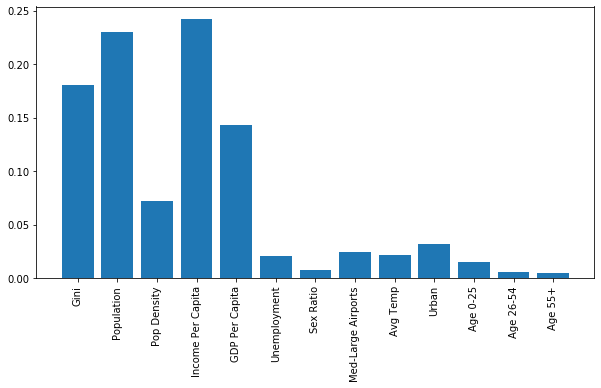

In [64]:
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X_s, y_cases)
print('score', rfr.score(X_s, y_cases), '\n')
plt.figure(figsize=(10,5))
plt.bar(X_demo.columns, rfr.feature_importances_)
plt.xticks(fontsize=10, rotation=90)
plt.show()

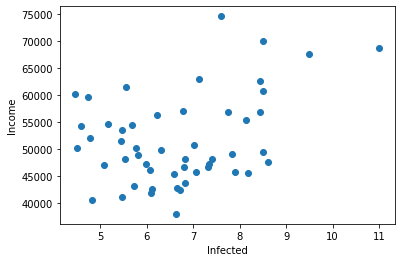

In [65]:
plt.scatter(np.log(df['Infected']), df['Income Per Capita'])
plt.xlabel('Infected')
plt.ylabel('Income')
plt.show()

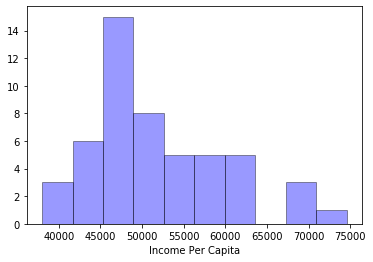

In [66]:
# seaborn histogram
sns.distplot(df['Income Per Capita'], hist=True, kde=False, 
             bins=10, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()

# Next steps, remove highly correlated features or perform some sort of feature reduction